In [95]:
import quandl  # Access to Sharadar Core US Equities Bundle
api_key = '7B87ndLPJbCDzpNHosH3'

import math
import platform
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import torch
import pandas as pd
from IPython.display import display
import time

from datetime import date, datetime, time, timedelta


print("Python version: ", platform.python_version())
print("Pytorch version: {}".format(torch.__version__))

Python version:  3.6.6
Pytorch version: 1.1.0


## Access Quandl

In [241]:
quandl.ApiConfig.api_key = api_key
quandl.get_table('SHARADAR/SF1', ticker='AMZN', calendardate='2011-12-31,2009-12-31')

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
None,,,,,,,,,,,,,,,,,,,,,
0,AMZN,MRY,2011-12-31,2011-12-31,2011-12-31,2019-10-25,-316000000,25278000000,1.978875e+10,17490000000,...,454754345,453000000,461000000,106.130,23323000000,379000000,291000000,0,51.486,2594000000
1,AMZN,MRY,2009-12-31,2009-12-31,2009-12-31,2019-10-25,-56000000,13813000000,9.360000e+09,9797000000,...,432982766,433000000,442000000,56.603,12579000000,290000000,253000000,0,29.051,2433000000
2,AMZN,MRT,2011-12-31,2011-12-31,2011-12-31,2019-10-25,-316000000,25278000000,1.978875e+10,17490000000,...,454754345,453000000,461000000,106.130,23323000000,379000000,291000000,0,51.486,2594000000
3,AMZN,MRT,2009-12-31,2009-12-31,2009-12-31,2019-10-25,-56000000,13813000000,9.360000e+09,9797000000,...,432982766,433000000,442000000,56.603,12579000000,290000000,253000000,0,29.051,2433000000
4,AMZN,MRQ,2011-12-31,2011-12-31,2011-12-31,2019-10-25,-316000000,25278000000,NaN,17490000000,...,454754345,453000000,464000000,38.479,23323000000,379000000,86000000,0,51.486,2594000000
5,AMZN,MRQ,2009-12-31,2009-12-31,2009-12-31,2019-10-25,-56000000,13813000000,NaN,9797000000,...,432982766,439000000,451000000,21.686,12579000000,290000000,84000000,0,28.654,2433000000
6,AMZN,ARY,2011-12-31,2012-02-01,2011-12-31,2019-10-25,-316000000,25278000000,1.978875e+10,17490000000,...,455068465,453000000,461000000,106.130,23323000000,379000000,291000000,0,51.486,2594000000
7,AMZN,ARY,2009-12-31,2010-01-29,2009-12-31,2019-10-25,-56000000,13813000000,9.360000e+09,9797000000,...,444546442,433000000,442000000,56.603,12579000000,290000000,253000000,0,29.051,2433000000
8,AMZN,ART,2011-12-31,2012-02-01,2011-12-31,2019-10-25,-316000000,25278000000,1.978875e+10,17490000000,...,455068465,453000000,461000000,106.130,23323000000,379000000,291000000,0,51.486,2594000000


## Equity Price Dataset (SHARADAR_SEP)
Date Range: 1998-09-25 til now
Number of stocks: 16786

In [9]:
stocks = pd.read_csv("../datasets/sharader/SHARADAR_SEP.csv")
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36612264 entries, 0 to 36612263
Data columns (total 10 columns):
ticker         object
date           object
open           float64
high           float64
low            float64
close          float64
volume         float64
dividends      float64
closeunadj     float64
lastupdated    object
dtypes: float64(7), object(3)
memory usage: 2.7+ GB


In [112]:
print("Begin and end of Dataset")
display(stocks.head())
display(stocks.tail())

print("Info about dates")
display(stocks['date'].describe())
print("Info about tickers")
display(stocks['ticker'].describe())

Begin and end of Dataset


,ticker,date,open,high,low,close,volume,dividends,closeunadj,lastupdated
0,A,2019-11-29,80.960,81.240,80.470,80.770,835780.0,0.0,80.770,2019-11-29
1,AA,2019-11-29,20.430,20.470,20.158,20.350,1223254.0,0.0,20.350,2019-11-29
2,AACG,2019-11-29,1.813,1.813,1.805,1.805,963.0,0.0,1.805,2019-11-29
3,AAGIY,2019-11-29,40.580,40.580,40.010,40.020,163700.0,0.0,40.020,2019-11-30
4,AAL,2019-11-29,28.920,29.265,28.660,28.740,2970843.0,0.0,28.740,2019-11-29


,ticker,date,open,high,low,close,volume,dividends,closeunadj,lastupdated
36612259,VTXPF,2020-01-10,32.400,32.400,32.400,32.400,0.0,0.0,32.400,2020-01-11
36612260,WRTBF,2020-01-10,10.850,10.850,10.850,10.850,0.0,0.0,10.850,2020-01-11
36612261,WSCRF,2020-01-10,0.127,0.127,0.127,0.127,0.0,0.0,0.127,2020-01-11
36612262,XTPEF,2020-01-10,0.585,0.585,0.585,0.585,0.0,0.0,0.585,2020-01-11
36612263,ZIMCF,2020-01-10,0.050,0.050,0.050,0.050,0.0,0.0,0.050,2020-01-11


Info about dates


count       36612264
unique          5543
top       1998-09-25
freq            7834
Name: date, dtype: object

Info about tickers


count     36612264
unique       16786
top           KFRC
freq          5543
Name: ticker, dtype: object

### Calculate price appreciation and create label

In [195]:
# Extract a set of tickers
tickers = ['RUN']

start_date = '03-01-2009'
end_date = '03-31-2019'

for ticker in tickers:
    
    # extract date-sorted dataset for 1 stock
    stock = stocks[stocks['ticker']==ticker]
    stock_sorted = stock.sort_values(by=['date'])
    stock_sorted['date']= pd.to_datetime(stock_sorted['date']) 

    # filter dataset to the Bull Market from 03-01-2009 til 3-31-2019
    mask = (stock_sorted['date'] >= start_date) & (stock_sorted['date'] <= end_date)
    
    if sum(mask) is not 0:
        stock_sorted = stock_sorted.loc[mask]
        stock_sorted = stock_sorted.set_index('date')  # set date as index

        display(stock_sorted.head)

        # Calculate price appreciation for the stock
        price_start = stock_sorted.iloc[0]['close']
        price_end = stock_sorted.iloc[-1]['close']
        appreciation = price_end/price_start

        # label = Is the stock a 10 Bagger?
        label = appreciation > 10.0

        print(ticker, appreciation, label)       


<bound method NDFrame.head of            ticker   open    high    low  close      volume  dividends  \
date                                                                    
2015-08-05    RUN  13.06  13.310  10.40  10.77  14080595.0        0.0   
2015-08-06    RUN  11.00  11.200   8.23   8.77   3570430.0        0.0   
2015-08-07    RUN   9.19  10.200   8.77  10.14   1624299.0        0.0   
2015-08-10    RUN  10.73  10.730  10.00  10.12    435917.0        0.0   
2015-08-11    RUN  10.00  10.030   9.50   9.79    349732.0        0.0   
...           ...    ...     ...    ...    ...         ...        ...   
2019-03-25    RUN  14.20  14.410  14.01  14.08    678320.0        0.0   
2019-03-26    RUN  14.22  14.319  14.04  14.23    667672.0        0.0   
2019-03-27    RUN  14.23  14.330  13.73  14.23    931928.0        0.0   
2019-03-28    RUN  14.25  14.330  13.96  14.27    780636.0        0.0   
2019-03-29    RUN  14.37  14.480  13.99  14.06   1018791.0        0.0   

            closeuna

RUN 1.3054781801299908 False


In [127]:
# Extract all tickers
tickers = list(stocks['ticker'].unique())

data = []

start_date = '03-01-2009'
end_date = '03-31-2019'

for ticker in tickers:
    
    # extract date-sorted dataset for 1 stock
    stock = stocks[stocks['ticker']==ticker]
    stock_sorted = stock.sort_values(by=['date'])
    stock_sorted['date']= pd.to_datetime(stock_sorted['date']) 

    # filter dataset to the Bull Market from 03-01-2009 til 3-31-2019
    mask = (stock_sorted['date'] >= start_date) & (stock_sorted['date'] <= end_date)
    
    # If this is an active ticker during the period
    if sum(mask) is not 0:
        stock_sorted = stock_sorted.loc[mask]
        stock_sorted = stock_sorted.set_index('date')  # set date as index

        # Calculate price appreciation for the stock
        price_start = stock_sorted.iloc[0]['close']
        price_end = stock_sorted.iloc[-1]['close']
        appreciation = price_end/price_start

        # label = Is the stock a 10 Bagger?
        label = appreciation > 10.0
        
        data.append([ticker, appreciation, label])  # store is new database
        
        # print the 10+ Baggers
        if label:
            print(ticker, appreciation, label)
        

AAL 12.8582995951417 True
AAON 10.52415679124886 True
AAPL 15.11979622701584 True
AAXN 15.072022160664819 True
ABG 25.499999999999996 True
ABMD 47.519134775374376 True
ABR 22.362068965517246 True
ACAD 34.87012987012987 True
ACB 15.07487520798669 True
ACLS 17.96428571428571 True
ADBE 16.614089775561098 True
ADSK 13.138279932546375 True
AER 16.741007194244606 True
AGM 22.21779141104295 True
AGM.A 22.01290322580645 True
AGO 11.661417322834646 True
AJRD 16.223744292237445 True
ALGN 45.27547770700637 True
ALK 10.90343889644453 True
AMD 12.696517412935325 True
AMOT 20.10526315789474 True
AMRN 29.657142857142862 True
AMZN 28.726407485078237 True
AOS 13.290129611166503 True
ASGN 31.27586206896552 True
ASH 26.529711375212223 True
ASML 13.168767507002803 True
ATRC 21.261904761904763 True
ATRI 12.126414573557826 True
ATSG 121.31578947368422 True
AUDC 13.702970297029703 True
AVGO 18.585290482076637 True
AX 22.984126984126984 True
AXDX 12.73939393939394 True
AXL 18.82894736842105 True
AZPN 17.20462

SPGI 11.729805013927578 True
SPNS 17.767441860465116 True
SPR 10.520689655172415 True
SRI 18.037499999999998 True
SRPT 35.473214285714285 True
SSP 21.21212121212121 True
STAA 25.325925925925922 True
STX 13.013586956521738 True
STZ 13.507704160246533 True
STZ.B 13.15742725880551 True
SUI 14.759651307596513 True
SWKS 13.281803542673108 True
TAL 14.431999999999999 True
TARO 11.685405405405406 True
TCEHY 10.327942497753819 True
TCX 57.985714285714295 True
TDG 13.547896150402867 True
TDY 10.4088713219148 True
TEN 17.870967741935484 True
TER 10.137404580152673 True
THRM 14.342412451361868 True
TPL 40.71842105263158 True
TPX 10.50455373406193 True
TREE 89.45547073791349 True
TREX 34.600674915635544 True
TRS 31.16494845360825 True
TSCO 13.175202156334233 True
TSLA 11.714524905818335 True
TTC 13.484818805093045 True
TTWO 16.702654867256637 True
TXT 11.43566591422122 True
TYL 15.391566265060241 True
UAA 12.283556072051134 True
UAL 18.727699530516432 True
UCFC 17.98076923076923 True
UFI 12.647058

In [171]:
print("Begin and end of Dataset")
display(stock_sorted.head())
display(stock_sorted.tail())

Begin and end of Dataset


,ticker,open,high,low,close,volume,dividends,closeunadj,lastupdated
date,,,,,,,,,
2014-10-22,TARA,452.0,480.000,400.0,401.2,16983.800,0.0,10.03,2020-01-10
2014-10-23,TARA,400.0,414.400,400.0,400.0,6088.575,0.0,10.00,2020-01-10
2014-10-24,TARA,400.0,403.996,400.0,400.0,994.975,0.0,10.00,2020-01-10
2014-10-27,TARA,400.0,403.600,400.0,400.0,1217.400,0.0,10.00,2020-01-10
2014-10-28,TARA,400.8,403.200,400.0,400.0,1475.750,0.0,10.00,2020-01-10


,ticker,open,high,low,close,volume,dividends,closeunadj,lastupdated
date,,,,,,,,,
2019-03-25,TARA,132.80,141.104,126.400,136.40,7034.400,0.0,3.410,2020-01-10
2019-03-26,TARA,143.46,152.000,136.500,149.60,6194.325,0.0,3.740,2020-01-10
2019-03-27,TARA,152.00,152.400,134.400,139.20,9012.725,0.0,3.480,2020-01-10
2019-03-28,TARA,23.20,24.800,19.004,20.04,468725.675,0.0,0.501,2020-01-10
2019-03-29,TARA,20.58,21.160,20.000,20.12,88867.625,0.0,0.503,2020-01-10


### Sort Results by Tickers and Save to File

In [197]:
df = pd.DataFrame(data, columns =['ticker','appreciation', '10bagger'])
df = df.sort_values(by=['ticker'])

display(df.head())

df.to_csv (r'stock_apprec_tickersorted.cvs', index = None, header=True)

,ticker,appreciation,10bagger
0,A,6.339117,False
1,AA,1.224348,False
10150,AAAGY,1.275556,False
7112,AAAP,3.331837,False
6275,AAC,0.099459,False


### Display Results

[4209 4927  936  361  161   16    1]
Total num of tickers: 10611
Num of 10+ Baggers: 539
Percent 10+ Baggers: 5.079634341720856 %


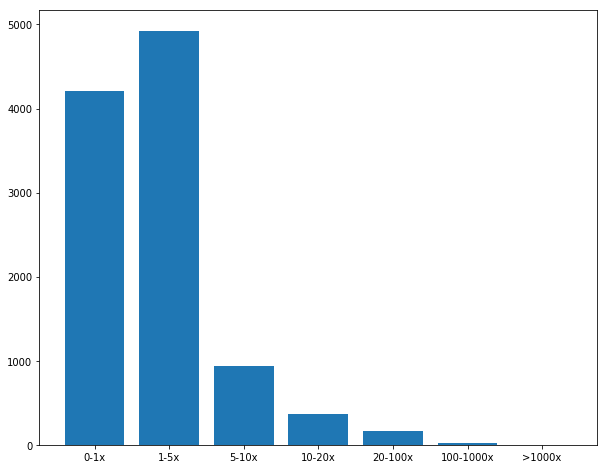

In [189]:
apprec = np.array(df['appreciation'])

bin_edges = [0, 1.0, 5.0, 10, 20, 100, 1000, 10000]
num, _ = np.histogram(apprec, bins=bin_edges)

print(num)

total_tickers = sum(num)
total_10_baggers = sum(num[3:])

print("Total num of tickers: {}".format(total_tickers))
print("Num of 10+ Baggers: {}".format(total_10_baggers))
print("Percent 10+ Baggers: {} %".format(total_10_baggers/total_tickers*100))

x = np.arange(7)

plt.figure(figsize=(10,8))

plt.bar(x, num)
plt.xticks(x, ('0-1x', '1-5x', '5-10x','10-20x', '20-100x', '100-1000x','>1000x'))
plt.show()

## Stock Tickers Dataset (SHARADAR_TICKERS)

Useful information about the stock tickets

In [201]:
tickers = pd.read_csv("../datasets/sharader/SHARADAR_TICKERS.csv")
tickers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16788 entries, 0 to 16787
Data columns (total 28 columns):
table             16788 non-null object
permaticker       16788 non-null int64
ticker            16788 non-null object
name              16788 non-null object
exchange          16788 non-null object
isdelisted        16788 non-null object
category          16788 non-null object
cusips            16630 non-null object
siccode           16324 non-null float64
sicsector         16324 non-null object
sicindustry       16324 non-null object
famasector        0 non-null float64
famaindustry      15769 non-null object
sector            16061 non-null object
industry          16788 non-null object
scalemarketcap    14358 non-null object
scalerevenue      13952 non-null object
relatedtickers    6787 non-null object
currency          16788 non-null object
location          16634 non-null object
lastupdated       16788 non-null object
firstadded        16788 non-null object
firstpricedate 

In [202]:
display(tickers.head())

,table,permaticker,ticker,name,exchange,isdelisted,category,cusips,siccode,sicsector,...,currency,location,lastupdated,firstadded,firstpricedate,lastpricedate,firstquarter,lastquarter,secfilings,companysite
0,SEP,110248,CHPMW,CHP Merger Corp,NASDAQ,N,Domestic Warrant,NaN,6770.0,Finance Insurance And Real Estate,...,USD,New Jersey; U.S.A,2020-01-14,2020-01-14,2020-01-10,2020-01-14,NaN,NaN,NaN,NaN
1,SEP,110250,LIVKW,LIV Capital Acquisition Corp,NASDAQ,N,Domestic Warrant,NaN,6770.0,Finance Insurance And Real Estate,...,USD,Cayman Islands,2020-01-14,2020-01-14,2020-01-14,2020-01-14,NaN,NaN,NaN,NaN
2,SEP,110251,AMHCW,Amplitude Healthcare Acquisition Corp,NASDAQ,N,Domestic Warrant,NaN,6770.0,Finance Insurance And Real Estate,...,USD,New York; U.S.A,2020-01-13,2020-01-10,2020-01-10,2020-01-13,NaN,NaN,NaN,NaN
3,SEP,110252,ALUS.WS,Alussa Energy Acquisition Corp,NYSE,N,Domestic Warrant,NaN,6770.0,Finance Insurance And Real Estate,...,USD,Cayman Islands,2020-01-10,2020-01-10,2020-01-10,2020-01-10,NaN,NaN,NaN,NaN
4,SEP,110259,HUGE,FSD Pharma Inc,NASDAQ,N,Canadian,35954B107,2833.0,Manufacturing,...,USD,Ontario; Canada,2020-01-14,2020-01-09,2020-01-09,2020-01-14,2017-12-31,2018-12-31,https://www.sec.gov/cgi-bin/browse-edgar?actio...,NaN


In [214]:
ticker = 'RUN'

display(tickers[tickers['ticker']==ticker]['firstpricedate'])
display(tickers[tickers['ticker']==ticker]['lastpricedate'])
display(tickers[tickers['ticker']==ticker]['category'])
display(tickers[tickers['ticker']==ticker]['sicsector'])
display(tickers[tickers['ticker']==ticker]['sicindustry'])
display(tickers[tickers['ticker']==ticker]['sector'])
display(tickers[tickers['ticker']==ticker]['industry'])
display(tickers[tickers['ticker']==ticker]['scalemarketcap'])
display(tickers[tickers['ticker']==ticker]['scalerevenue'])

,table,permaticker,ticker,name,exchange,isdelisted,category,cusips,siccode,sicsector,...,currency,location,lastupdated,firstadded,firstpricedate,lastpricedate,firstquarter,lastquarter,secfilings,companysite
9749,SEP,157136,RUN,Sunrun Inc,NASDAQ,N,Domestic,86771W105,3430.0,Manufacturing,...,USD,California; U.S.A,2020-01-14,2016-03-23,2015-08-05,2020-01-14,2013-12-31,2019-09-30,https://www.sec.gov/cgi-bin/browse-edgar?actio...,http://www.sunrun.com


9749    2015-08-05
Name: firstpricedate, dtype: object

9749    2020-01-14
Name: lastpricedate, dtype: object

9749    Domestic
Name: category, dtype: object

9749    Manufacturing
Name: sicsector, dtype: object

9749    Heating Equip Except Elec & Warm Air; & Plumbi...
Name: sicindustry, dtype: object

9749    Technology
Name: sector, dtype: object

9749    Solar
Name: industry, dtype: object

9749    4 - Mid
Name: scalemarketcap, dtype: object

9749    3 - Small
Name: scalerevenue, dtype: object

### Join Stock Ticker Dataset with Label Dataset (Apprec, 10bagger)

In [218]:
stocks = pd.read_csv("stock_apprec_tickersorted.cvs")

In [219]:
stock_tickers = stocks.set_index('ticker').join(tickers.set_index('ticker'))

In [235]:
display(stock_tickers.info())
display(stock_tickers.head())

<class 'pandas.core.frame.DataFrame'>
Index: 10611 entries, A to ZZ
Data columns (total 29 columns):
appreciation      10611 non-null float64
10bagger          10611 non-null bool
table             10611 non-null object
permaticker       10611 non-null int64
name              10611 non-null object
exchange          10611 non-null object
isdelisted        10611 non-null object
category          10611 non-null object
cusips            10490 non-null object
siccode           10262 non-null float64
sicsector         10262 non-null object
sicindustry       10262 non-null object
famasector        0 non-null float64
famaindustry      10013 non-null object
sector            10125 non-null object
industry          10611 non-null object
scalemarketcap    8809 non-null object
scalerevenue      8441 non-null object
relatedtickers    4310 non-null object
currency          10611 non-null object
location          10564 non-null object
lastupdated       10611 non-null object
firstadded        10611 no

None

,appreciation,10bagger,table,permaticker,name,exchange,isdelisted,category,cusips,siccode,...,currency,location,lastupdated,firstadded,firstpricedate,lastpricedate,firstquarter,lastquarter,secfilings,companysite
ticker,,,,,,,,,,,,,,,,,,,,,
A,6.339117,False,SEP,196290,Agilent Technologies Inc,NYSE,N,Domestic,00846U101,3826.0,...,USD,California; U.S.A,2020-01-14,2014-09-26,1999-11-18,2020-01-14,1997-06-30,2019-09-30,https://www.sec.gov/cgi-bin/browse-edgar?actio...,http://www.agilent.com
AA,1.224348,False,SEP,124392,Alcoa Corp,NYSE,N,Domestic,013872106,3350.0,...,USD,New York; U.S.A,2020-01-14,2016-11-01,2016-11-01,2020-01-14,2014-12-31,2019-09-30,https://www.sec.gov/cgi-bin/browse-edgar?actio...,http://www.alcoa.com
AAAGY,1.275556,False,SEP,120538,Altana Aktiengesellschaft,NYSE,Y,ADR,02143N103,2834.0,...,USD,Jordan,2018-10-16,2018-02-13,2002-05-22,2010-08-12,2000-12-31,2005-12-31,https://www.sec.gov/cgi-bin/browse-edgar?actio...,NaN
AAAP,3.331837,False,SEP,155760,Advanced Accelerator Applications SA,NASDAQ,Y,ADR,00790T100,2834.0,...,USD,France,2018-06-28,2016-05-19,2015-11-11,2018-02-09,2012-12-31,2016-12-31,https://www.sec.gov/cgi-bin/browse-edgar?actio...,NaN
AAC,0.099459,False,SEP,187592,AAC Holdings Inc,NYSE,Y,Domestic,000307108,8093.0,...,USD,Tennessee; U.S.A,2019-10-25,2015-09-11,2014-10-02,2019-10-25,2013-09-30,2019-09-30,https://www.sec.gov/cgi-bin/browse-edgar?actio...,NaN


### Remove Stock Warrants

In [222]:
stock_tickers.category.unique()

array(['Domestic', 'ADR', 'Canadian', 'Domestic Primary',
       'Domestic Warrant', 'ADR Primary', 'ADR Warrant',
       'Domestic Preferred', 'ADR Preferred', 'Domestic Secondary',
       'ADR Secondary', 'Canadian Primary', 'Canadian Warrant',
       'Canadian Preferred'], dtype=object)

In [230]:
stock_tickers.loc['Z']

appreciation                                                3.11458
10bagger                                                      False
table                                                           SEP
permaticker                                                  179220
name                                               Zillow Group Inc
exchange                                                     NASDAQ
isdelisted                                                        N
category                                           Domestic Primary
cusips                                          98954M200 98954A107
siccode                                                        7389
sicsector                                                  Services
sicindustry                          Services-Business Services Nec
famasector                                                      NaN
famaindustry                                      Business Services
sector                                          

In [228]:
stock_tickers.loc['ZG']

appreciation                                                1.33855
10bagger                                                      False
table                                                           SEP
permaticker                                                  119315
name                                               Zillow Group Inc
exchange                                                     NASDAQ
isdelisted                                                        N
category                                         Domestic Secondary
cusips                                                    98954M101
siccode                                                        7389
sicsector                                                  Services
sicindustry                          Services-Business Services Nec
famasector                                                      NaN
famaindustry                                      Business Services
sector                                          

In [231]:
stock_tickers.loc['ZCVVV']

appreciation                            0.908075
10bagger                                   False
table                                        SEP
permaticker                               111245
name                            Zillow Group Inc
exchange                                  NASDAQ
isdelisted                                     Y
category                        Domestic Warrant
cusips                                       NaN
siccode                                     7389
sicsector                               Services
sicindustry       Services-Business Services Nec
famasector                                   NaN
famaindustry                   Business Services
sector                               Real Estate
industry                    Real Estate Services
scalemarketcap                               NaN
scalerevenue                                 NaN
relatedtickers                        ZG ZAVVV Z
currency                                     USD
location            

In [232]:
stock_tickers.loc['ZAVVV']

appreciation                             1.08879
10bagger                                   False
table                                        SEP
permaticker                               111246
name                            Zillow Group Inc
exchange                                  NASDAQ
isdelisted                                     Y
category                        Domestic Warrant
cusips                                       NaN
siccode                                     7389
sicsector                               Services
sicindustry       Services-Business Services Nec
famasector                                   NaN
famaindustry                   Business Services
sector                               Real Estate
industry                    Real Estate Services
scalemarketcap                               NaN
scalerevenue                                 NaN
relatedtickers                        ZG Z ZCVVV
currency                                     USD
location            

In [247]:
equities = ['Domestic', 'ADR', 'Canadian', 'Domestic Primary', 'ADR Primary', 'Domestic Preferred', \
            'ADR Preferred', 'Domestic Secondary', 'ADR Secondary', 'Canadian Primary', 'Canadian Preferred']

valid_stock_tickers = stock_tickers.loc[stock_tickers['category'].isin(equities)]
valid_stock_tickers.sort_index()

,appreciation,10bagger,table,permaticker,name,exchange,isdelisted,category,cusips,siccode,...,currency,location,lastupdated,firstadded,firstpricedate,lastpricedate,firstquarter,lastquarter,secfilings,companysite
ticker,,,,,,,,,,,,,,,,,,,,,
A,6.339117,False,SEP,196290,Agilent Technologies Inc,NYSE,N,Domestic,00846U101,3826.0,...,USD,California; U.S.A,2020-01-14,2014-09-26,1999-11-18,2020-01-14,1997-06-30,2019-09-30,https://www.sec.gov/cgi-bin/browse-edgar?actio...,http://www.agilent.com
AA,1.224348,False,SEP,124392,Alcoa Corp,NYSE,N,Domestic,013872106,3350.0,...,USD,New York; U.S.A,2020-01-14,2016-11-01,2016-11-01,2020-01-14,2014-12-31,2019-09-30,https://www.sec.gov/cgi-bin/browse-edgar?actio...,http://www.alcoa.com
AAAGY,1.275556,False,SEP,120538,Altana Aktiengesellschaft,NYSE,Y,ADR,02143N103,2834.0,...,USD,Jordan,2018-10-16,2018-02-13,2002-05-22,2010-08-12,2000-12-31,2005-12-31,https://www.sec.gov/cgi-bin/browse-edgar?actio...,NaN
AAAP,3.331837,False,SEP,155760,Advanced Accelerator Applications SA,NASDAQ,Y,ADR,00790T100,2834.0,...,USD,France,2018-06-28,2016-05-19,2015-11-11,2018-02-09,2012-12-31,2016-12-31,https://www.sec.gov/cgi-bin/browse-edgar?actio...,NaN
AAC,0.099459,False,SEP,187592,AAC Holdings Inc,NYSE,Y,Domestic,000307108,8093.0,...,USD,Tennessee; U.S.A,2019-10-25,2015-09-11,2014-10-02,2019-10-25,2013-09-30,2019-09-30,https://www.sec.gov/cgi-bin/browse-edgar?actio...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYME,1.244615,False,SEP,123153,Zymeworks Inc,NYSE,N,Domestic,98985W102,2834.0,...,USD,British Columbia; Canada,2020-01-14,2017-09-02,2017-04-28,2020-01-14,2015-12-31,2019-09-30,https://www.sec.gov/cgi-bin/browse-edgar?actio...,http://www.zymeworks.com
ZYNE,0.333538,False,SEP,157146,Zynerba Pharmaceuticals Inc,NASDAQ,N,Domestic,98986X109,2834.0,...,USD,Pennsylvania; U.S.A,2020-01-14,2016-04-15,2015-08-05,2020-01-14,2013-12-31,2019-09-30,https://www.sec.gov/cgi-bin/browse-edgar?actio...,http://www.zynerba.com
ZYTO,2.727273,False,SEP,188776,Zyto Corp,OTC,Y,Domestic,989872106,3841.0,...,USD,Utah; U.S.A,2018-07-02,2016-02-17,2008-01-30,2016-01-22,2009-12-31,2012-09-30,https://www.sec.gov/cgi-bin/browse-edgar?actio...,NaN


In [248]:
valid_stock_tickers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10207 entries, A to ZZ
Data columns (total 29 columns):
appreciation      10207 non-null float64
10bagger          10207 non-null bool
table             10207 non-null object
permaticker       10207 non-null int64
name              10207 non-null object
exchange          10207 non-null object
isdelisted        10207 non-null object
category          10207 non-null object
cusips            10202 non-null object
siccode           9865 non-null float64
sicsector         9865 non-null object
sicindustry       9865 non-null object
famasector        0 non-null float64
famaindustry      9621 non-null object
sector            9727 non-null object
industry          10207 non-null object
scalemarketcap    8809 non-null object
scalerevenue      8441 non-null object
relatedtickers    3907 non-null object
currency          10207 non-null object
location          10165 non-null object
lastupdated       10207 non-null object
firstadded        10207 non-nul

In [249]:
valid_stock_tickers.to_csv (r'stock_tickers_sorted.cvs', header=True)